# Capstone Section 0: Ong Song Yi

# Capstone Section 1: Problem Statement

## Introduction

<br>
Credit Card fraud is a major ongoing global issue with billions of dollars lost every year. The amount is expected to reach $35.67 billion dollars by 2023. 
<br>
<br>

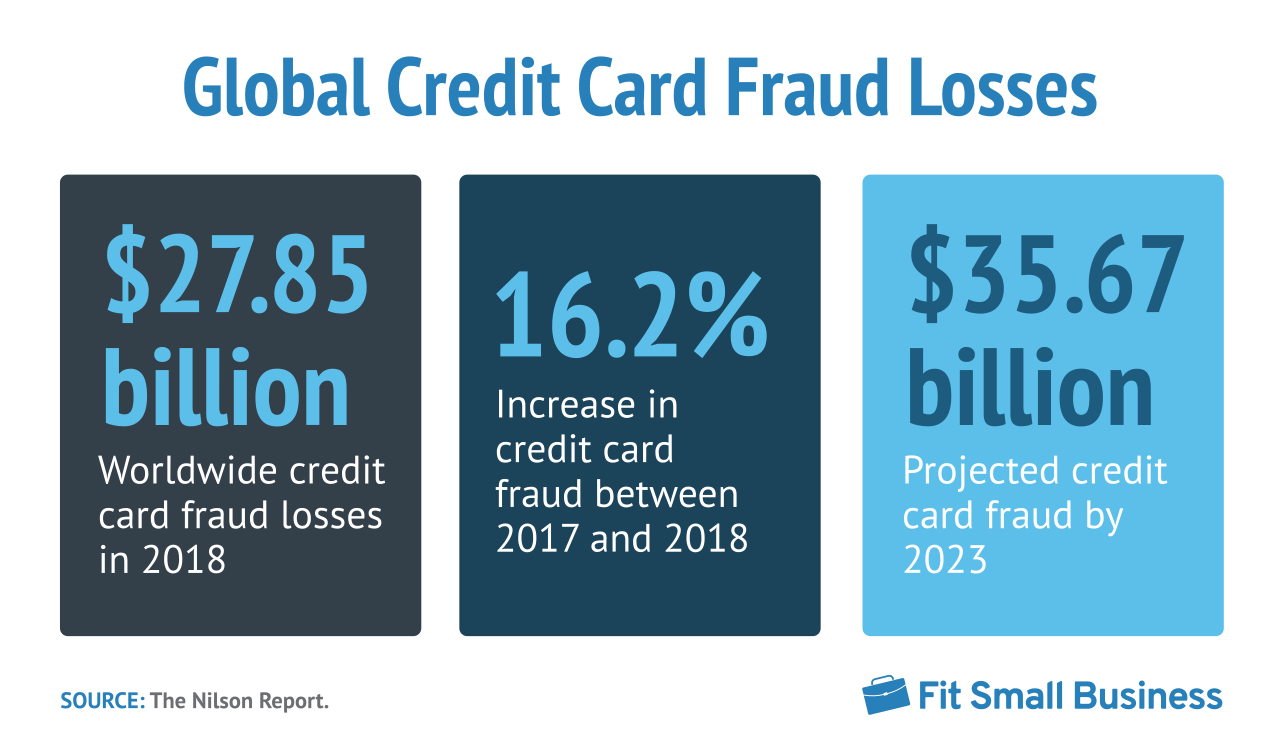

## Problem Statement
<br>
The COVID-19 pandemic has accelerated ecommerce growth with an increase of \$102 billion in 2020 and \$116 billion in 2021 within the US alone. This amount is set to increase within the coming years.
<br>
<br>

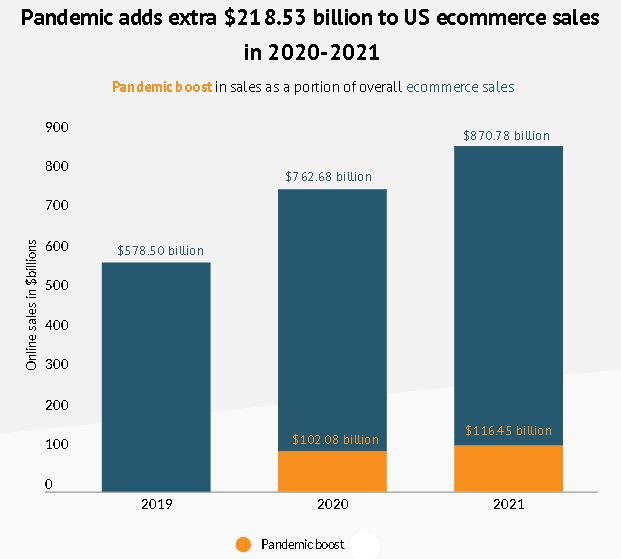
[Source](https://www.digitalcommerce360.com/article/coronavirus-impact-online-retail/)
<br>
<br>
Due to a rise in online spending and an expected increase in ecommerce growth within the future, the largest bank in Singapore, Development Bank of Singapore (DBS), has tasked its Data Science team to come up with an improved machine learning algorithm to detect credit cards fraud.
<br>
<br>
## Data Source
<br>
The data source is from this Kaggle site: 
<br>
<br>
There are 2 data files from the source, 1 titled 'fraudTest.csv' and the other titled 'fraudTrain.csv'. However, 'fraudTrain.csv' has close to 1.3 million rows while 'fraudTest.csv' has above 0.5 million transactions, therefore I will be working on 'fraudTest.csv'

[Data](https://www.kaggle.com/datasets/kartik2112/fraud-detection)
<br>
<br>
## Task
<br>

1) [Exploratory Data Analysis](#Capstone-Section-2:-Exploratory-Data-Analysis)


## Data Dictionary
<br>

 - trans_date_trans_time -> Transaction time stamp
 <br>
 - cc_num -> Credit card number
 <br>
 - merchant -> merchant name
 <br>
 - category -> transaction category
 <br>
 - amt -> Transaction amount
 <br>
 - first -> First name of card holder
 <br>
 - last -> Last name of card holder
 <br>
 - gender -> Sex of card holder
 <br>
 - street -> transaction address
 <br>
 - city -> transaction city
 <br>
 - state -> transaction state
 <br>
 - zip -> transaction zipcode
 <br>
 - lat -> transaction lattitude
 <br>
 - long -> transaction longitude
 <br>
 - city_pop -> Population of the city
 <br>
 - job -> job of the card holder
 <br>
 - dob -> date of birth of card holder
 <br>
 - trans_num -> transaction number of transaction
 <br>
 - unix_time -> time in unix format
 <br>
 - merch_lat -> lattitude of the merchant
 <br>
 - merch_long -> longitude of merchant
 <br>
 - is_fraud -> nature of transaction (fraud or not fraud)

# Capstone Section 2: Exploratory Data Analysis

## Importing Libraries

In [30]:
from wordcloud import WordCloud
import numpy as np, pandas as pd, seaborn as sns, plotly.express as px, matplotlib.pyplot as ply

## Reading Data Files

In [31]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./Data/fraudTest.csv.zip', compression='zip')
df = df.drop(labels='Unnamed: 0', axis=1)

# Exploratory Data Analysis (EDA)

In [32]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [34]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [35]:
df[df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


99.61401224136353
0.3859864315018058


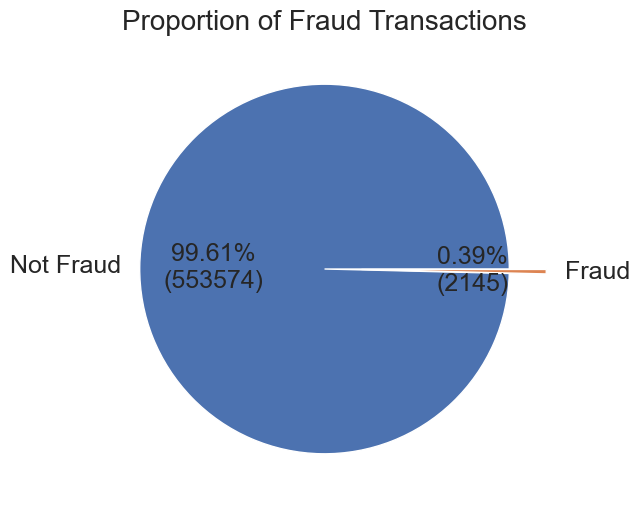

<Figure size 3000x1500 with 0 Axes>

In [36]:
# Setting the data to be plotted
is_fraud = pd.DataFrame(df['is_fraud'].value_counts(normalize=True)).reset_index()
is_fraud.at[0, 'index'] = 'Not Fraud'
is_fraud.at[1, 'index'] = 'Fraud'


# Define Function
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, len(df)*x/100)

# Plotting Pie Chart
plt.pie(data=is_fraud, x='is_fraud', labels='index', startangle=0, explode = [0,0.2],\
       autopct=my_fmt, textprops={'fontsize':18});

# Setting title for Pie Chart
plt.title('Proportion of Fraud Transactions', fontsize=20)

#Setting Size of Chart
plt.figure(figsize=(20,10), dpi=150)

# Showing Pie Chart
plt.show()

### Conclusion (So - Far):
<br>
1) The data set has 23 features and no missing values; this will aid in the swiftness of data cleaning.
<br>
<br>
2) In addition, I have noticed there are some columns, e.g., 'cc_num' and 'trans_num' that have no relevance to the target feature and will drop them.
<br>
<br>
3) The data is highly imbalanced, for every 1,000 credit card transactions, about 4 are fraud.
<br>
<br>
4) Thankfully there are no duplicate values.
<br>
<br>

In [37]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


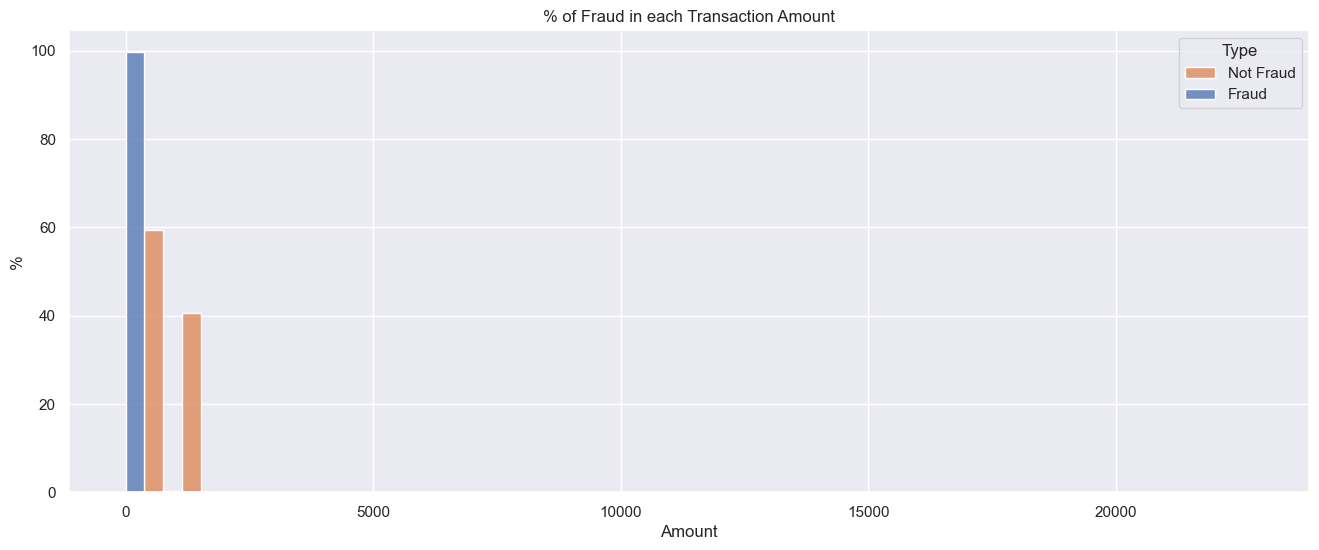

In [38]:
# Plotting Histogram
fig = sns.histplot(data=df, x='amt', hue='is_fraud', stat='percent', \
                  multiple='dodge', common_norm=False, bins=30)

# Setting axis labels
fig.set_ylabel('%')
fig.set_xlabel('Amount')

# Update axis labels
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.title('% of Fraud in each Transaction Amount')

# Showing Histogram
plt.show()

### Conclusion (So - Far):
<br>
1) As seen from the graph above, the bulk of fraud transactions can be found in transactions that have a value of < 2,000.
<br>
<br>
2) I will replot the above histogram for only transactions < 2,000 in value.
<br>
<br>

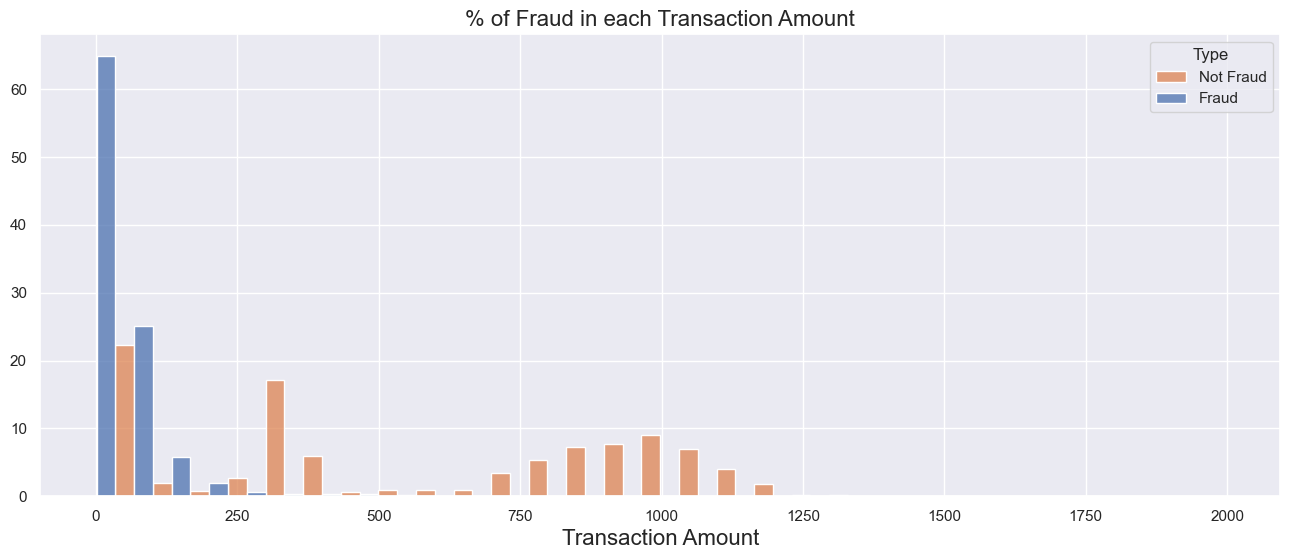

In [39]:
# Plotting Histogram
fig = sns.histplot(data=df[df['amt'] < 2000], x='amt', hue='is_fraud', stat='percent', \
                  multiple='dodge', common_norm=False, bins=30)

# Setting axis labels
fig.set_ylabel('%')
fig.set_xlabel('Amount')

# Update axis labels and title
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.title('% of Fraud in each Transaction Amount', fontsize=16)
plt.ylabel('')
plt.xlabel('Transaction Amount', fontsize=16)

#Setting Size of Chart
sns.set(rc={'figure.figsize':(20,6)})

# Showing Histogram
plt.show()

### Conclusion (So - Far):
<br>
1) With a more granular approach, we can tell that the bulk of fraud transactions fall under microtransactions.
<br>
<br>
2) Transactions around the value $1,000 and below, fraud makes up the majority or all the transactions.
<br>
<br>
3) Therefore, the transaction amount is a key feature in predicting the target variable and must be kept.
<br>
<br>

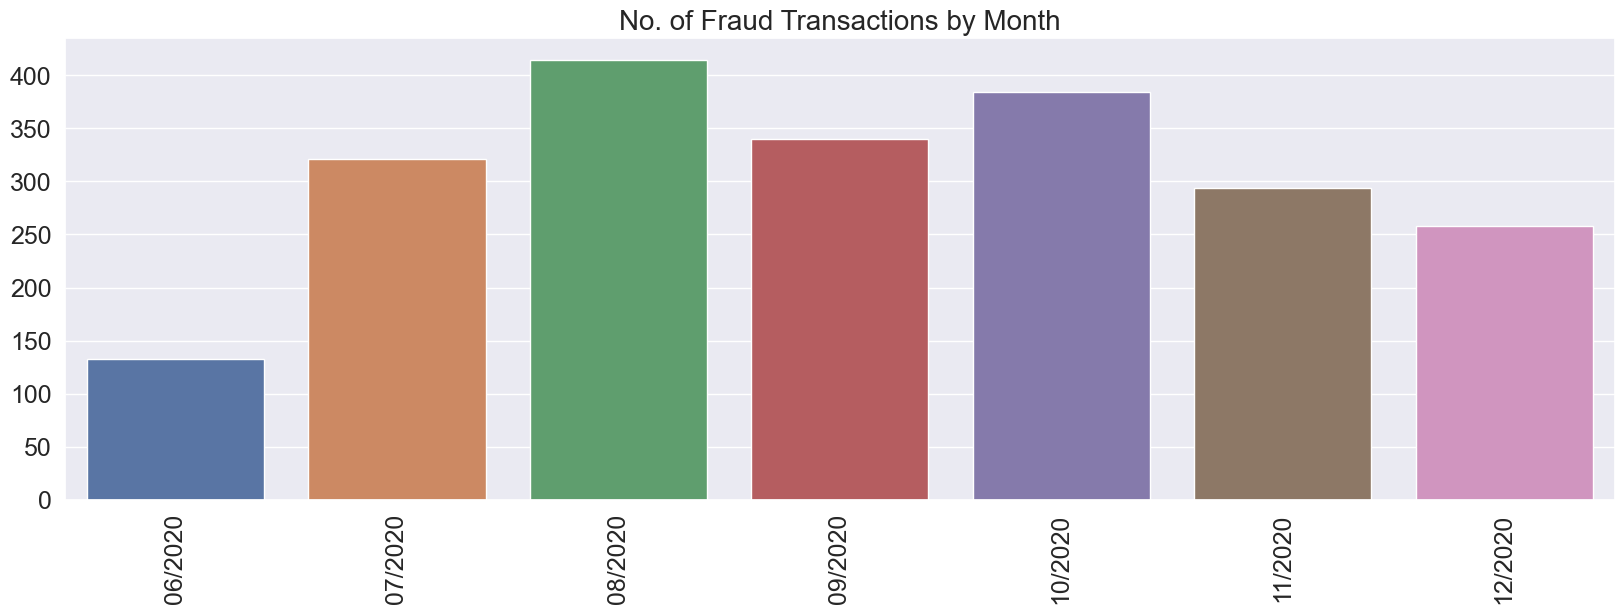

In [40]:
#Creating Dataframe for plotting
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['Year Month'] = df['trans_date_trans_time'].dt.strftime('%m/%Y')

#Plotting Chart
sns.countplot(data=df[df['is_fraud'] == 1], x='Year Month')

#Update axis labels
plt.xticks(rotation=90)
plt.title('No. of Fraud Transactions by Month', fontsize=20)
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#Setting Size of Chart
sns.set(rc={'figure.figsize':(30,15)})

#Showing Chart
plt.show();

### Conclusion (So - Far):
<br>
1) The number of frauds spiked during August and October.
<br>
<br>
2) I will drop the Year Month column as it does not cover the first half of the year.
<br>
<br>
3) In addition, let's deep dive into the day of the week to see if there are any clear trends.
<br>
<br>

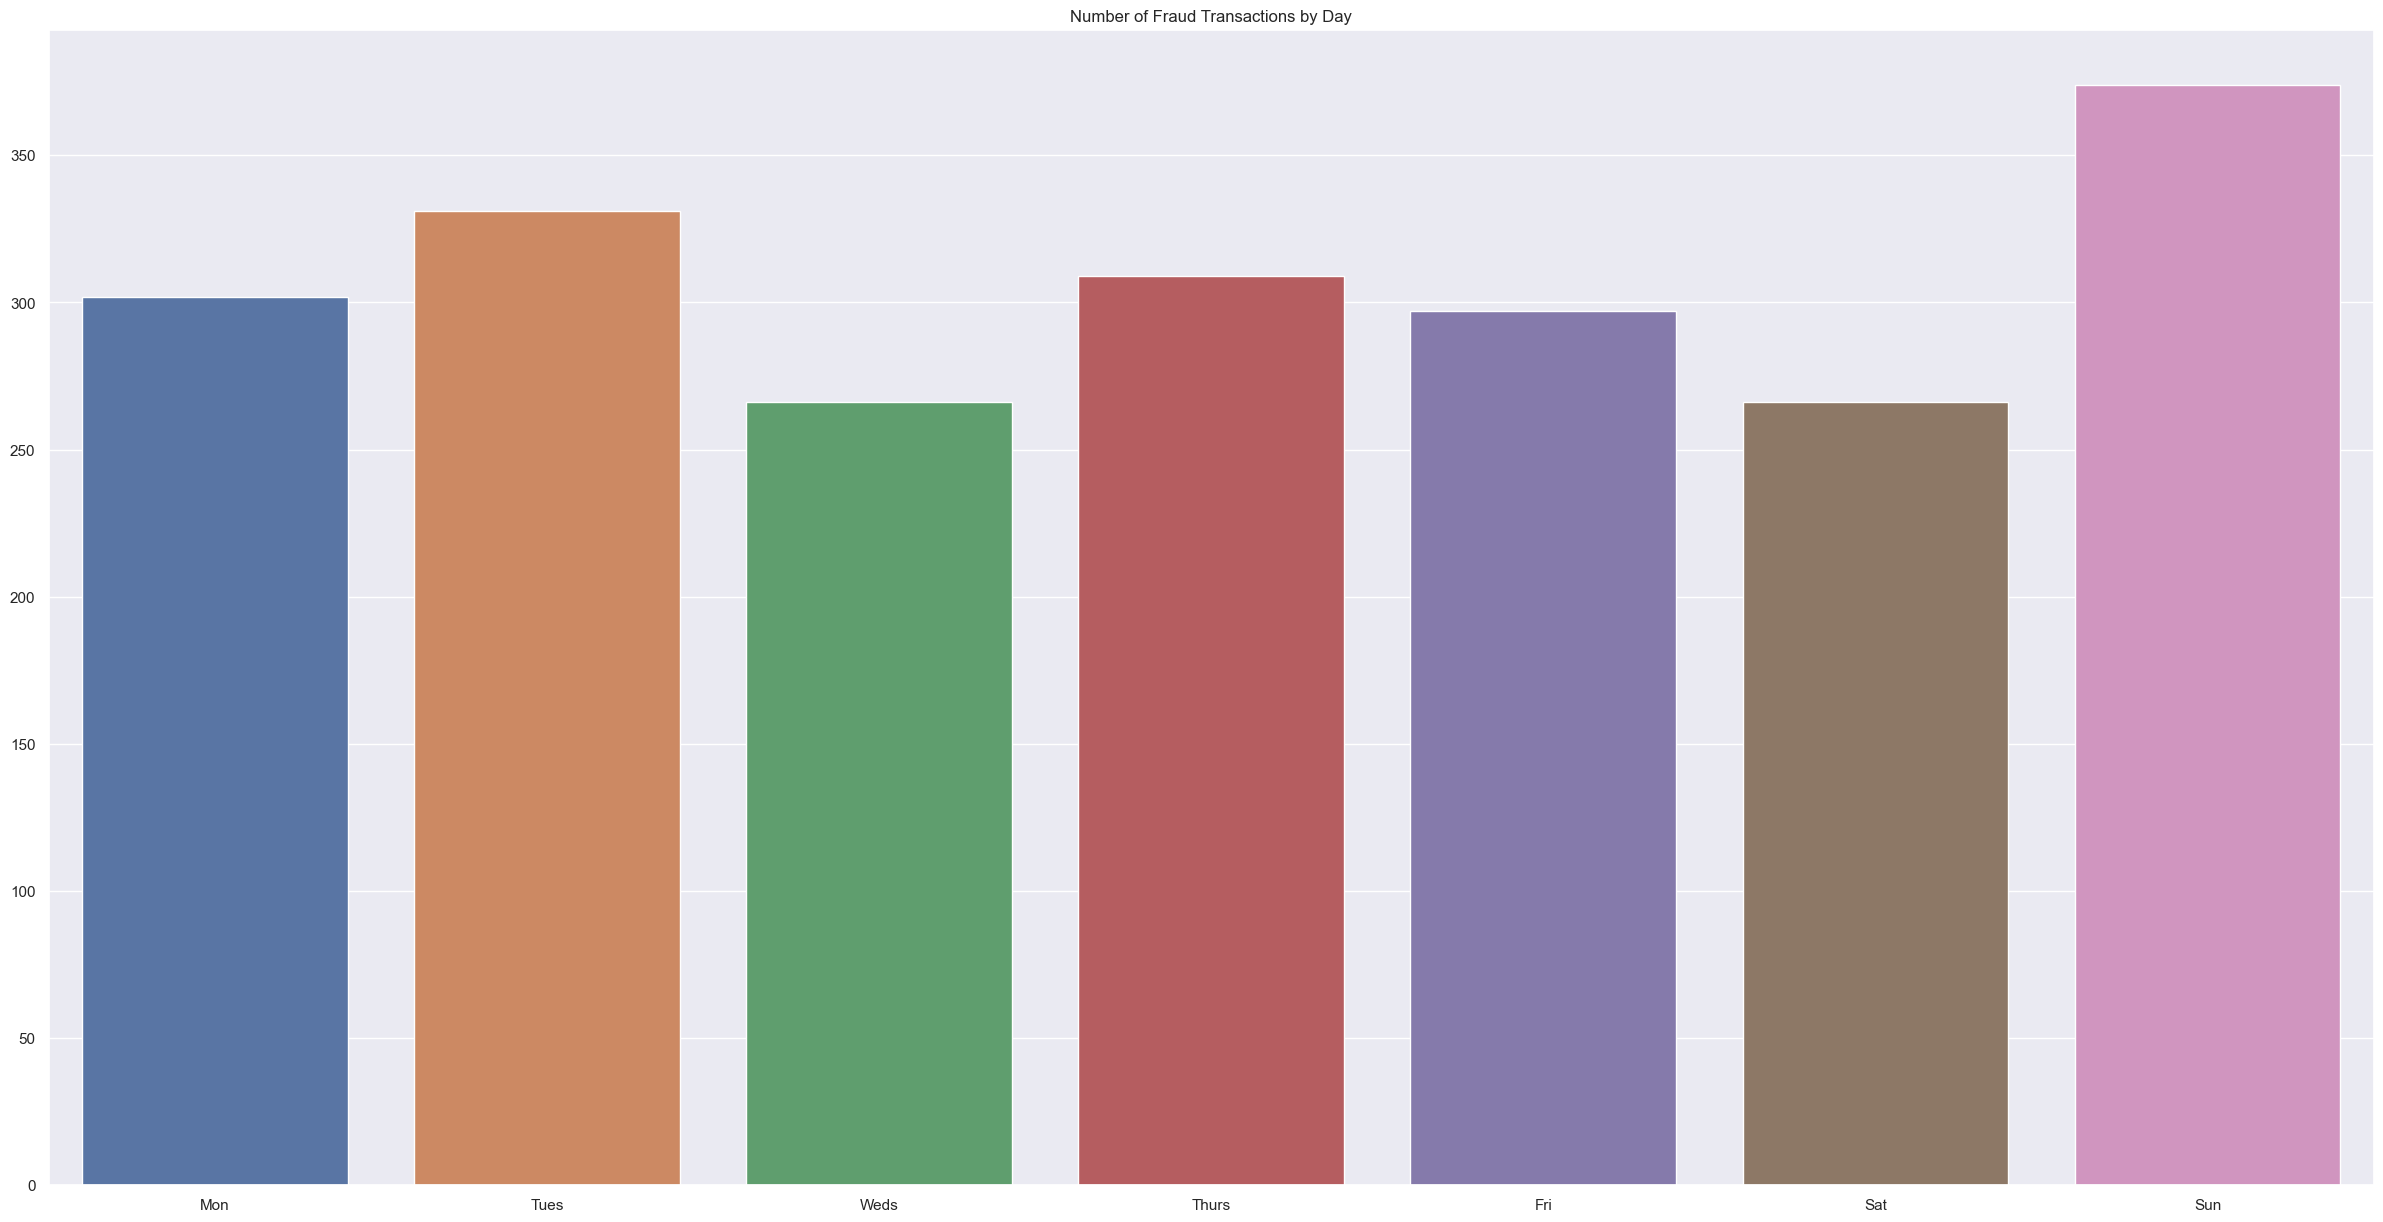

In [41]:
#Creating Dataframe for plotting
df['Day'] = df['trans_date_trans_time'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].apply(lambda x: days[x])
cats = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
fraud_by_day = pd.DataFrame(df.groupby('Day').sum()['is_fraud']).reset_index()
fraud_by_day['Day'] = pd.Categorical(fraud_by_day['Day'], categories=cats, ordered=True)
fraud_by_day = fraud_by_day.sort_values(by='Day')
fraud_by_day

#Plotting Chart
sns.barplot(data=fraud_by_day, x='Day', y='is_fraud')

#Update axis labels
plt.title("Number of Fraud Transactions by Day")
plt.ylabel('')
plt.xlabel('')

#Showing Chart
plt.show();

### Conclusion (So - Far):
<br>
1) The number of fraud transactions is highest on Tuesdays, Thursdays and Sundays.
<br>
<br>
2) I will convert the day column.
<br>
<br>
3) I will deep dive more granularly into which hour of the day fraud is committed.
<br>
<br>

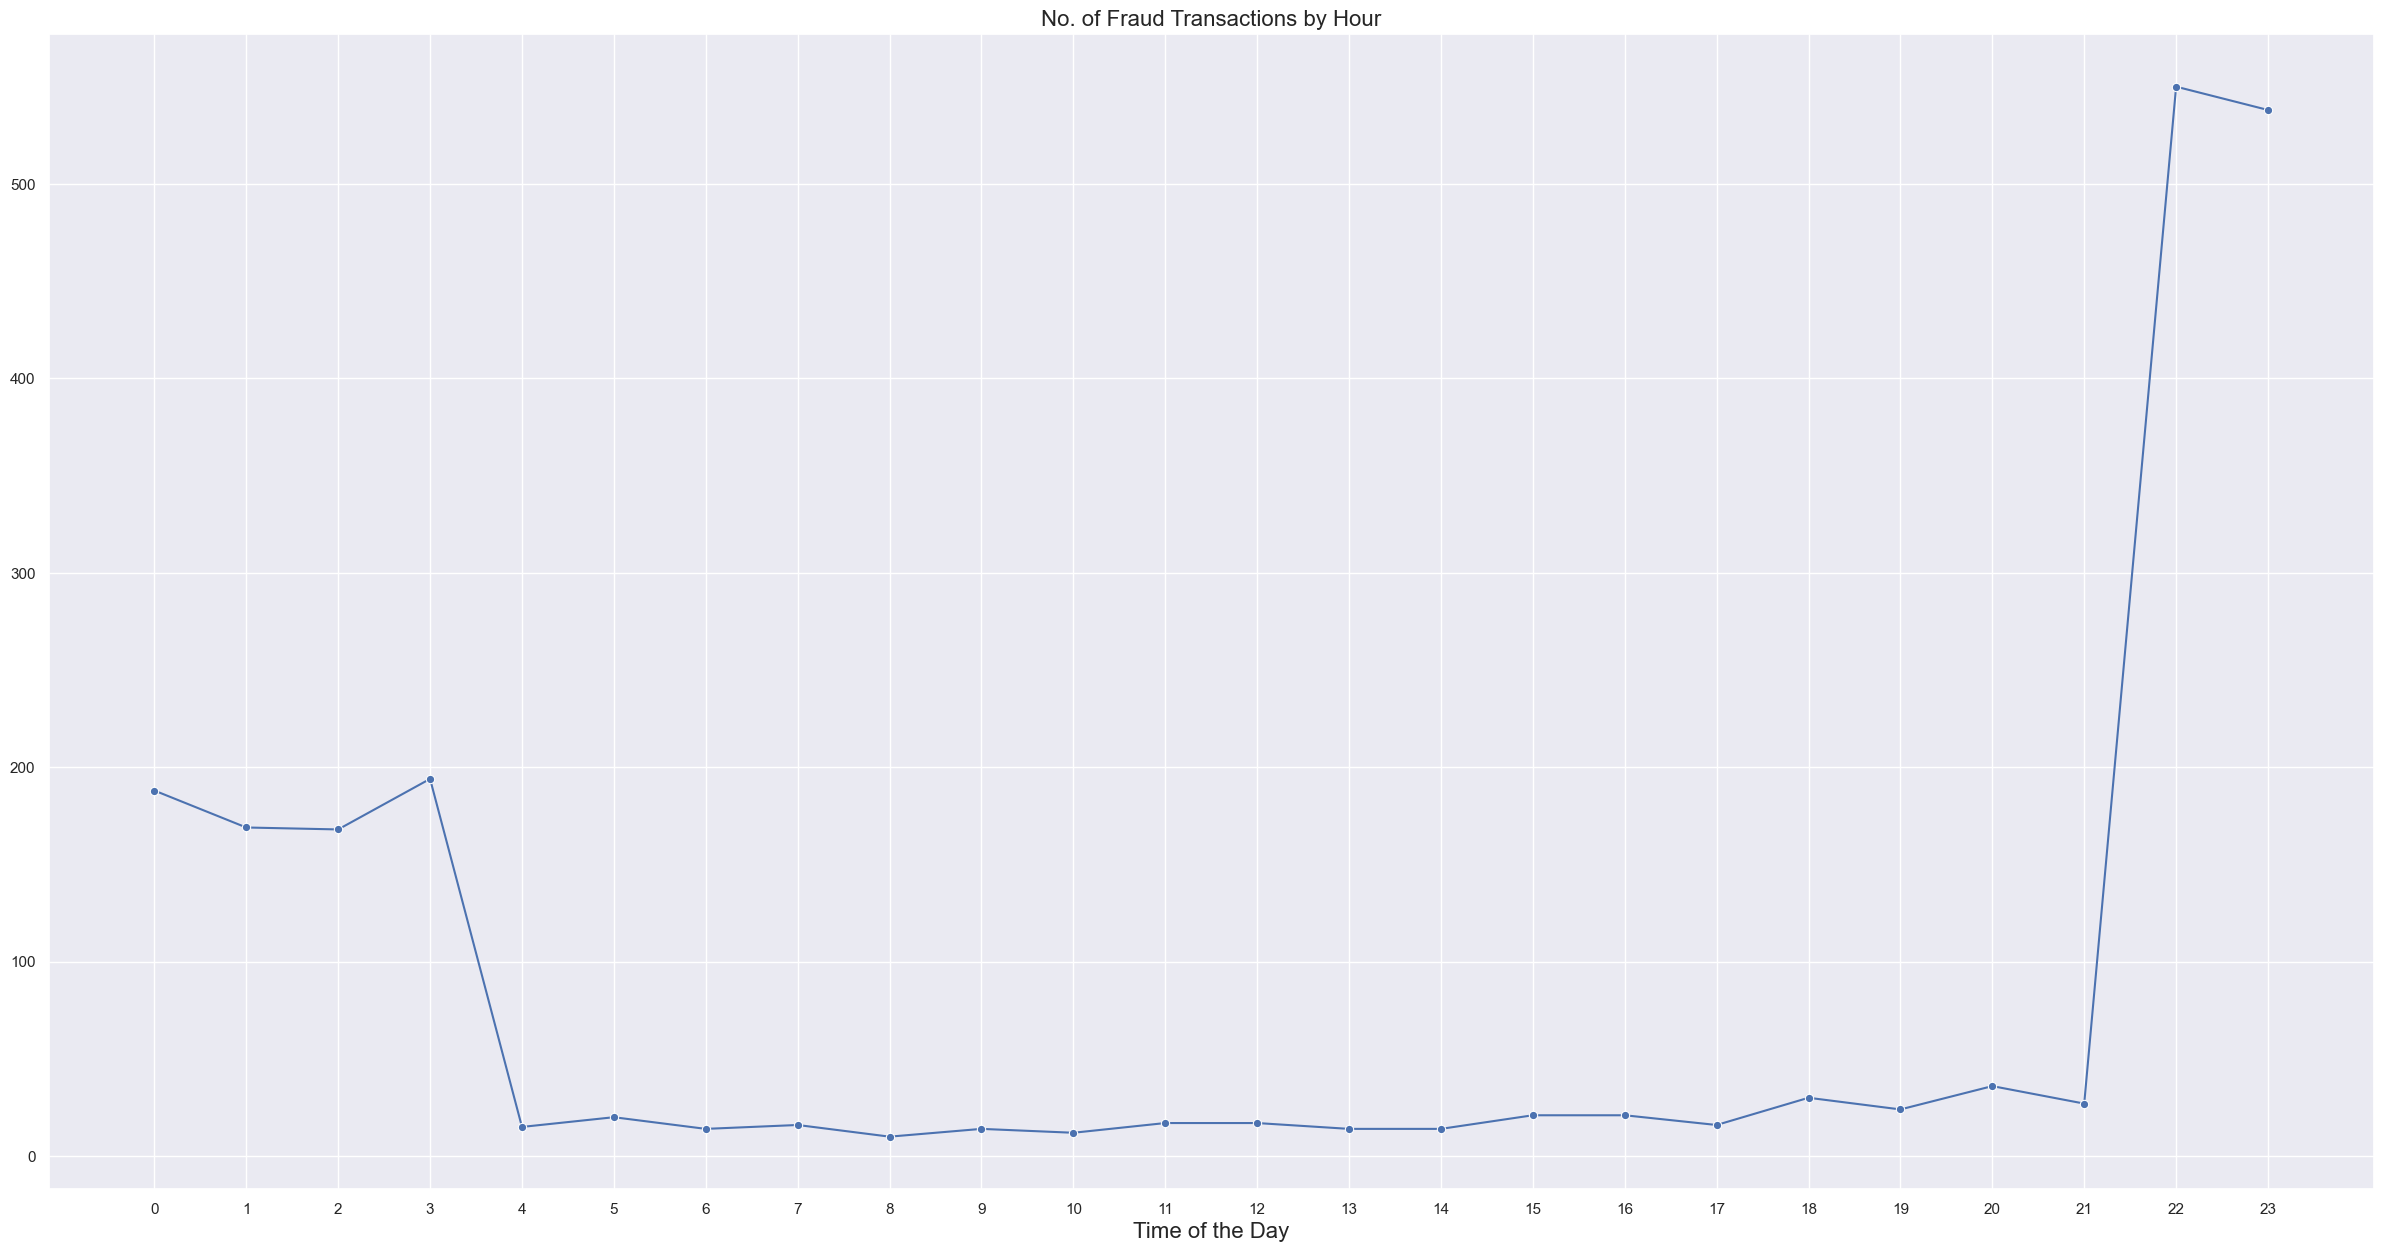

In [42]:
#Creating Dataframe for plotting
df['Hour'] = df['trans_date_trans_time'].dt.hour
fraud_by_hour = pd.DataFrame(df.groupby('Hour').sum()['is_fraud']).reset_index()

#Plotting Chart
sns.lineplot(data=fraud_by_hour, x='Hour', y='is_fraud', marker='o')

#Update axis
plt.xticks(fraud_by_hour['Hour'].values)
plt.ylabel(ylabel='Number')

#Title
plt.title('No. of Fraud Transactions by Hour', fontsize=16)
plt.ylabel('')
plt.xlabel('Time of the Day', fontsize=16)

#Setting Size of Chart
sns.set(rc={'figure.figsize':(16,6)})

#Showing Chart
plt.show();

### Conclusion (So - Far):
<br>
1) There is a noticeable spike in fraud transactions at night and the wee hours of the morning, from 10pm - 3am.
<br>
<br>
2) I will convert the time of the day to a categorical feature, day or night.
<br>
<br>

In [43]:
df['category'].value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

### Comments:
<br>
1) There are underscores in the transaction category column.
<br>
<br>
2) I will replace the underscore with a white space in order to visualise them.
<br>
<br>

In [44]:
df['category'] = df['category'].replace(to_replace='_', value=' ', regex=True)
df['merchant'] = df['merchant'].replace(to_replace='fraud_', value='', regex=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Year Month,Day,Hour
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,06/2020,Sun,12
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,06/2020,Sun,12
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,06/2020,Sun,12
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,06/2020,Sun,12
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,06/2020,Sun,12


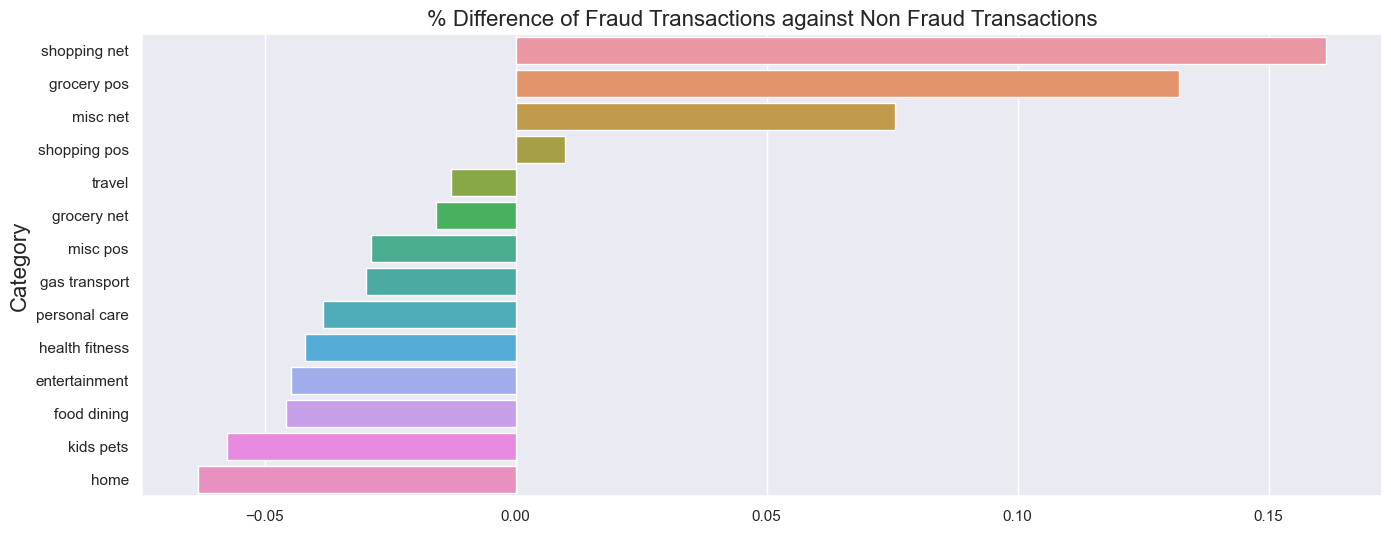

In [45]:
# Calculating % difference
a = df[df['is_fraud'] == 0]['category'].\
    value_counts(normalize=True).\
    reset_index().\
    rename(columns={'index': 'Category', 'category': 'Not Fraud %'})

b = df[df['is_fraud'] == 1]['category'].\
    value_counts(normalize=True).\
    reset_index().\
    rename(columns={'index': 'Category', 'category': 'Fraud %'})

ab = a.merge(right=b, on='Category')
ab['Diff'] = ab['Fraud %'] - ab['Not Fraud %']
ab = ab.sort_values(by='Diff', ascending=False)

#Plotting Chart
sns.barplot(data=ab, x='Diff', y='Category')

#Setting axis
plt.ylabel('Category', fontsize=16)
plt.xlabel('')

#Setting Size of Chart
sns.set(rc={'figure.figsize':(16,6)})

#Setting Title
plt.title('% Difference of Fraud Transactions against Non Fraud Transactions', fontsize=16)

#Show Chart
plt.show();

### Comments:
<br>
1) Some spending categories see more fraud than others such as shopping and grocery.
<br>
<br>
2) I will keep the spending category as it is a key indicator of fraud or not.
<br>
<br>

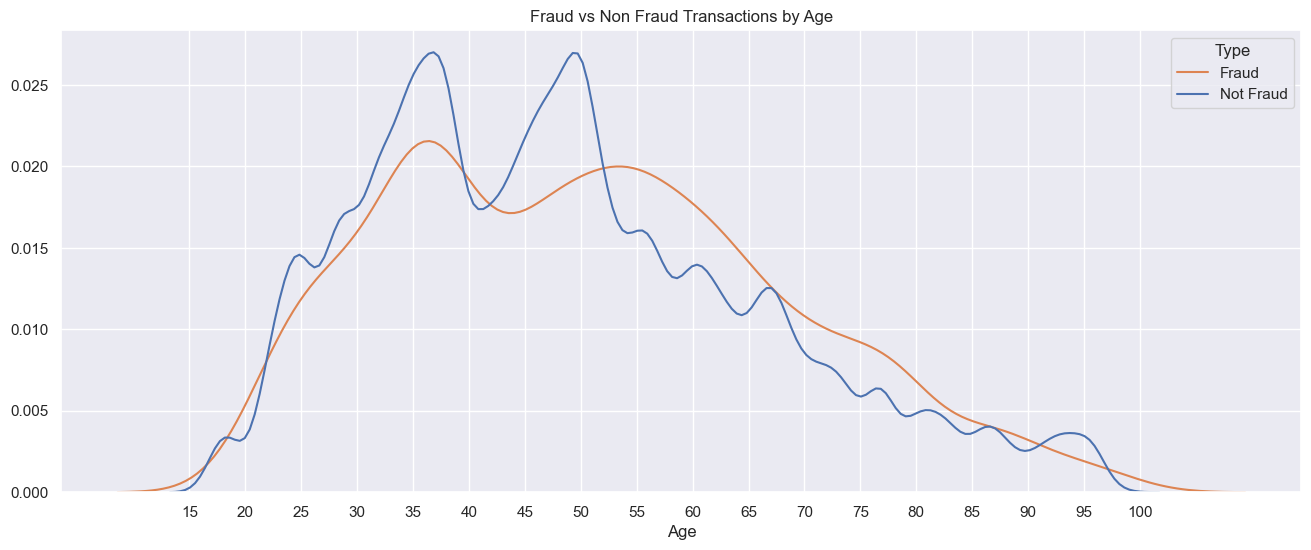

In [46]:
#Feature Engineering
df['dob'] = pd.to_datetime(df['dob'])
df['Age'] = pd.to_datetime('today').year - df['dob'].dt.year

#Plotting Chart
sns.kdeplot(data=df, x='Age', hue='is_fraud', common_norm=False)

#Setting axis
plt.xlabel('Age of Credit Card Holder')
plt.xticks(np.arange(15,105,5))
plt.xlabel('Age')
plt.ylabel('')

#Setting Title
plt.title('Fraud vs Non Fraud Transactions by Age')

#Setting legend
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#Show Chart
plt.show();

In [47]:
df['Age'].min()

17

In [48]:
df['Age'].max()

98

### Comments:
<br>
1) The minimum and maximum age in the dataframe is 17 and 98 respectively.
<br>
<br>
2) Fraud transactions are committed by people in 2 age groups, 30 - 40 and 45 - 60.
<br>
<br>
3) Age will be converted to a categorical feature, example, Gen X, Gen Y using the definition below:
<br>
<br>

[Definition](https://www.pewresearch.org/fact-tank/2019/01/17/where-millennials-end-and-generation-z-begins/)

In [49]:
#Creating Dataframe for plotting
from turtle import width


fraud_by_state = pd.DataFrame(df.groupby('state').sum()['is_fraud']).reset_index().rename(columns={'is_fraud': 'Fraud'})
transaction_by_state = pd.DataFrame(df.groupby('state').count()['is_fraud']).reset_index().rename(columns={'is_fraud': 'No. Of Transactions'})
percentage_by_state = fraud_by_state.merge(transaction_by_state, on='state')
percentage_by_state['% Fraud'] = percentage_by_state['Fraud'] * 100 / percentage_by_state['No. Of Transactions']

#Plotting Chart
fig = px.choropleth(data_frame=percentage_by_state, \
                    locations= 'state', \
                    color='% Fraud', \
                    locationmode='USA-states',\
                    scope='usa',\
                    color_continuous_scale='orrd')

fig.add_scattergeo(locations=fraud_by_state['state'],\
                  locationmode='USA-states',\
                  text=fraud_by_state['state'],\
                  mode='text')

#Setting Title
fig.update_layout(
    title={
        'text':'% Fraud by State',\
        'y':0.9,\
        'x':0.5},
        width=1400,
        height=600)

#Show Chart
fig.show();

### Comments:
<br>
1) There is no discernible trend in the location of states that have a higher incidence of fraud. The top 3 states that have a higher proportion of fraud are Alaska, Connecticut and Idaho.
<br>
<br>
2) Therefore, I will drop the State feature.
<br>
<br>

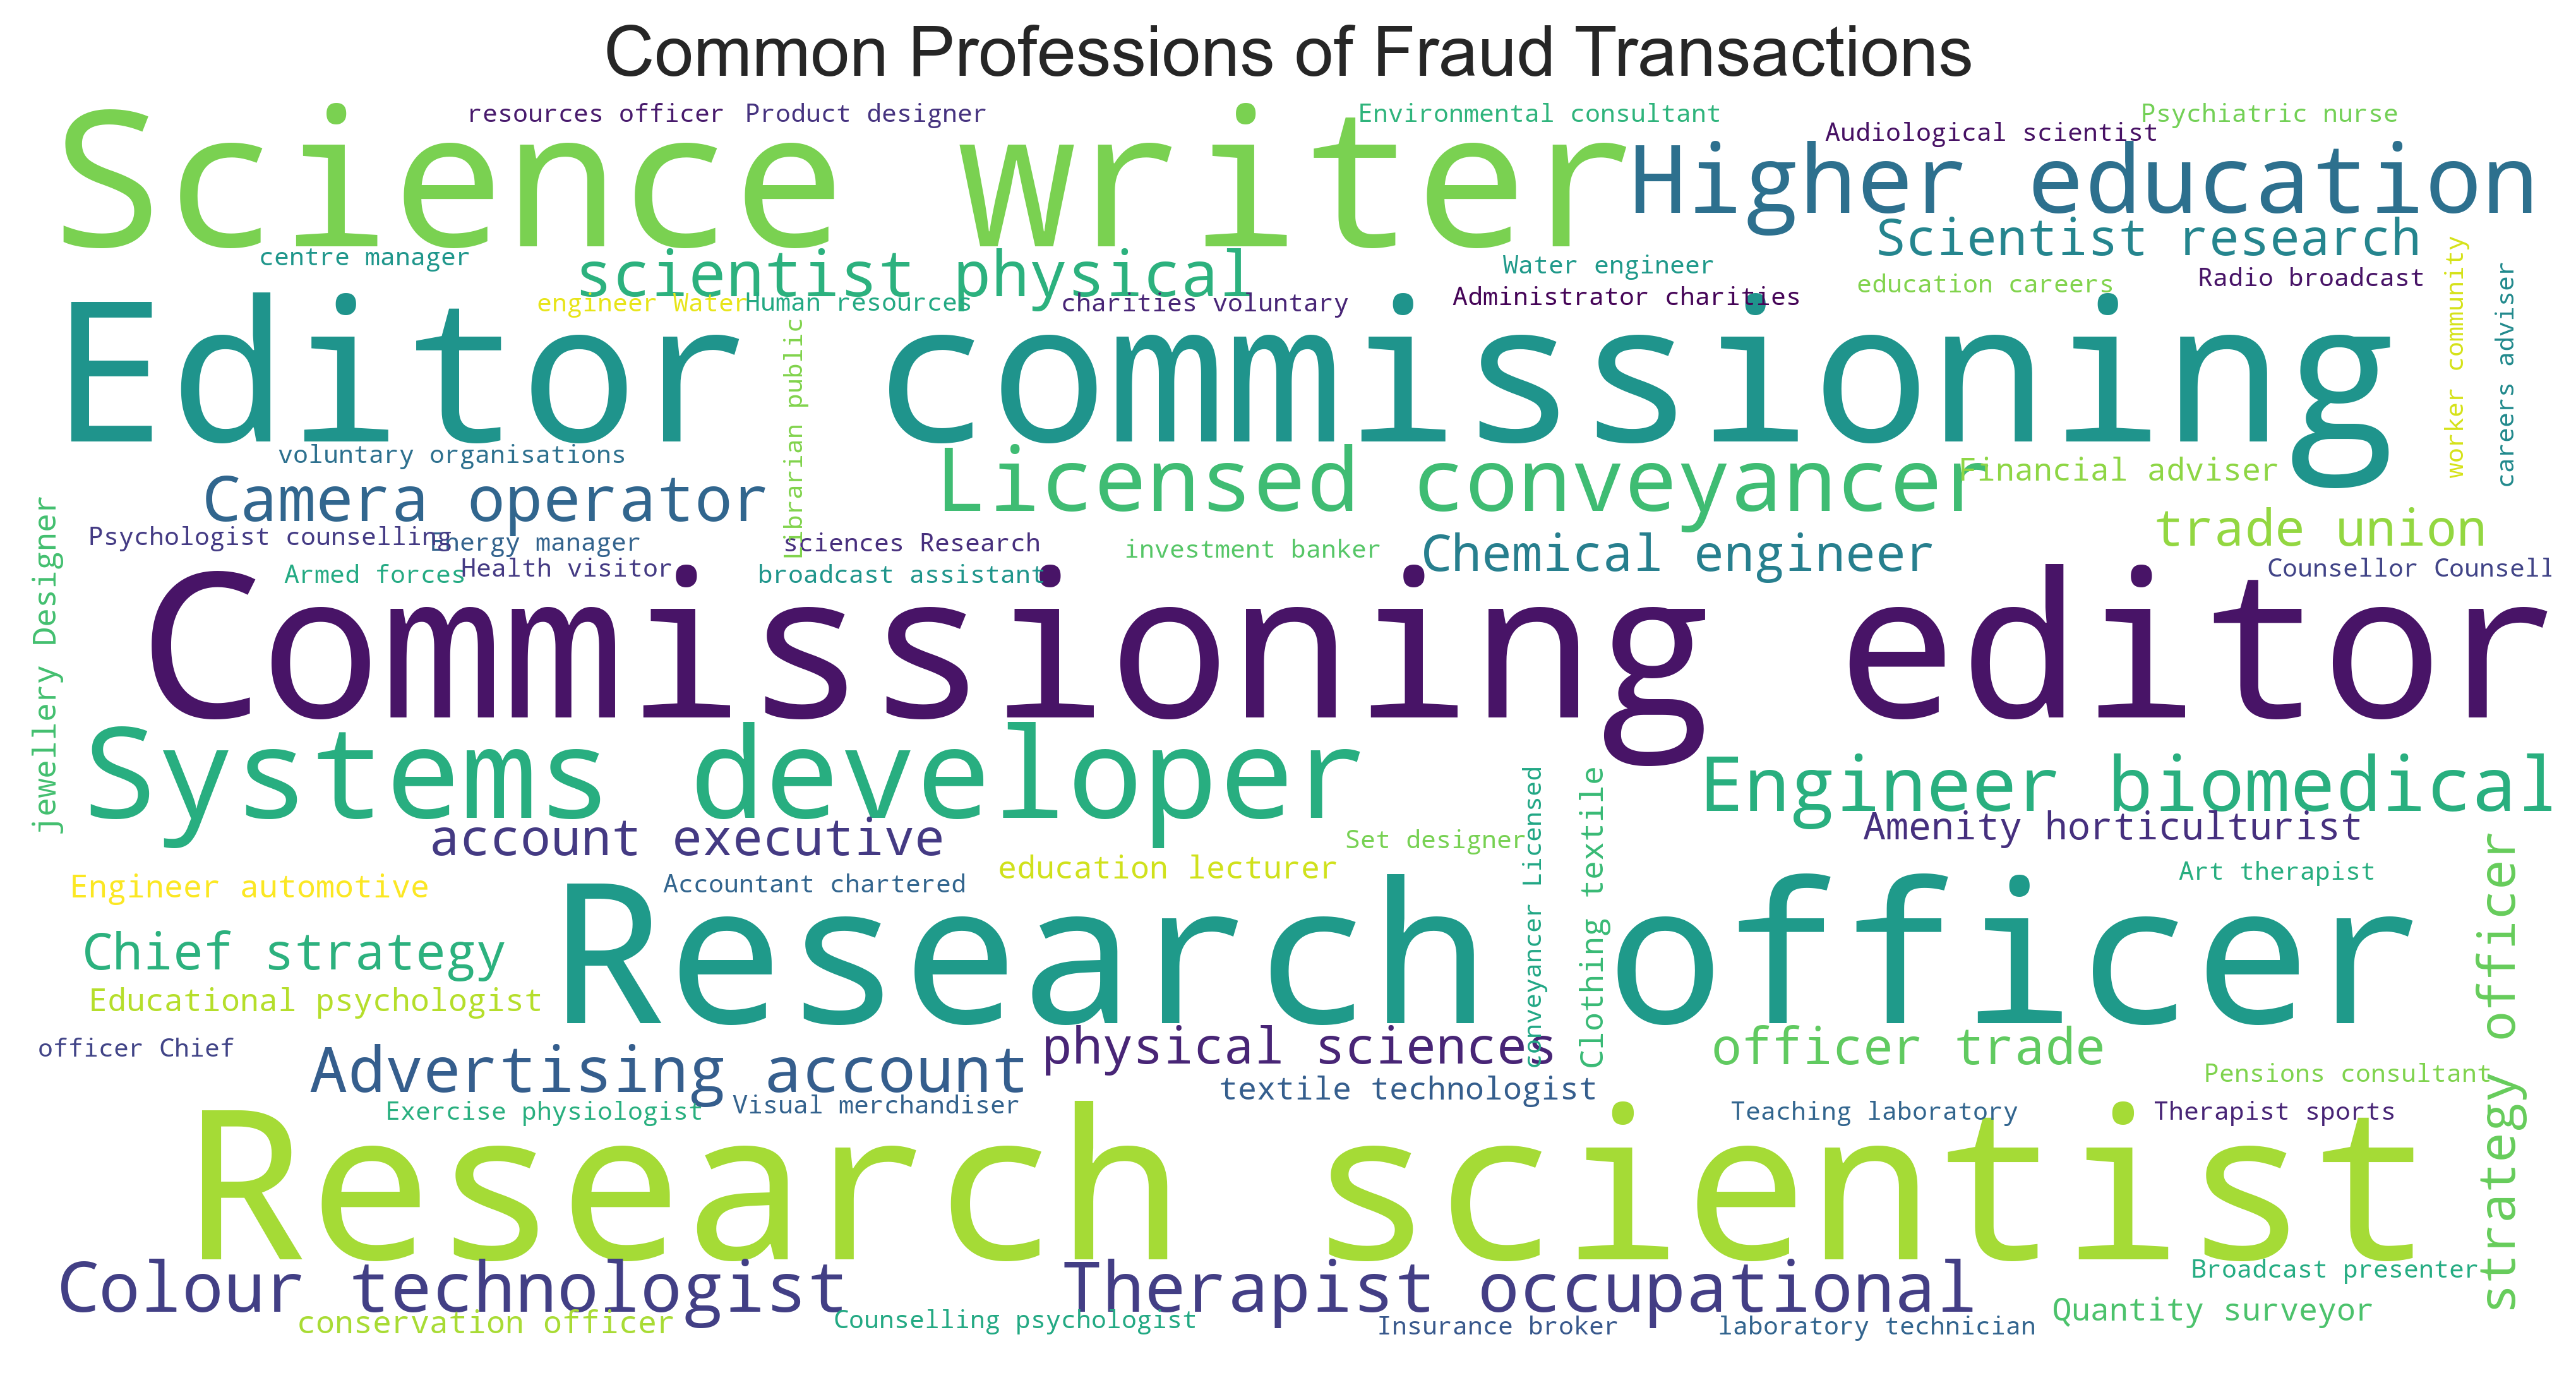

In [50]:
#Generating wordcloud to plot
text = ' '.join(i.capitalize() for i in df[df['is_fraud'] == 1]['job'])
wordcloud = WordCloud(background_color='white', scale=10).generate(text)

#Plotting wordcloud
plt.figure(figsize=(10,10), dpi=400)
plt.imshow(X=wordcloud)
plt.axis('off')
plt.title('Common Professions of Fraud Transactions', fontsize=20)
plt.tight_layout(pad=0)
plt.show();

### Comments:
<br>
1) Common professions of credit card holders susceptible to fraud are those in the science field with words like research and science in their job titles.
<br>
<br>
2) I will tfidf vectorize the Job feature in the dataframe.
<br>
<br>

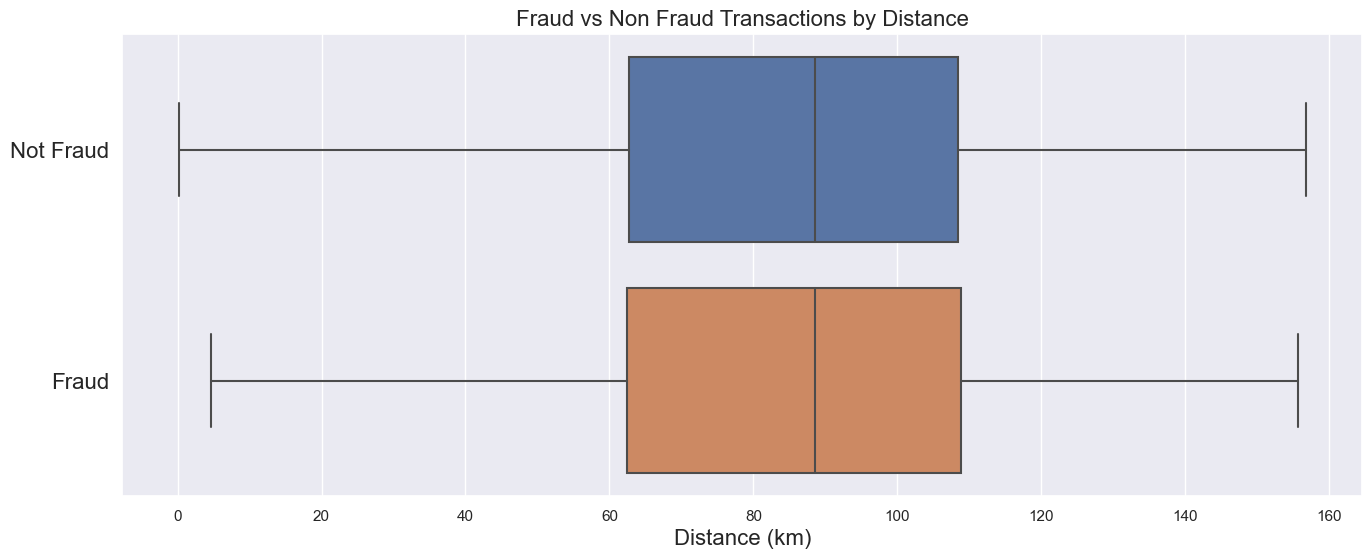

In [51]:
#Creating Dataframe for plotting
df['lat difference'] = abs(df['lat'] - df['merch_lat'])
df['long difference'] = abs(df['long'] - df['merch_long'])
df['distance'] = np.sqrt(pow((df['lat difference'] * 111),2) + \
                         pow((df['long difference'] * 111),2))

#Plotting Chart
ax = sns.boxplot(data=df, x='distance', y='is_fraud', orient='h')

#Setting Title
ax.set_title('Fraud vs Non Fraud Transactions by Distance', fontsize=16)

#Setting axis
ax.set_yticklabels(['Not Fraud', 'Fraud'], fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('Distance (km)', fontsize=16)

#Setting Size of Chart
sns.set(rc={'figure.figsize':(18,6)})

#Show Chart
plt.show();

### Comments:
<br>
1) From the boxplot visualisation, the distance between where the transaction occurred and location of the merchant is roughly uniform for both fraud and non-fraud transactions.
<br>
<br>
2) Having said that, the upper and lower whiskers for fraud transactions are shorter relative to non-fraud transactions. Other than that difference, they both share upper quartile, lower quartile and median values.

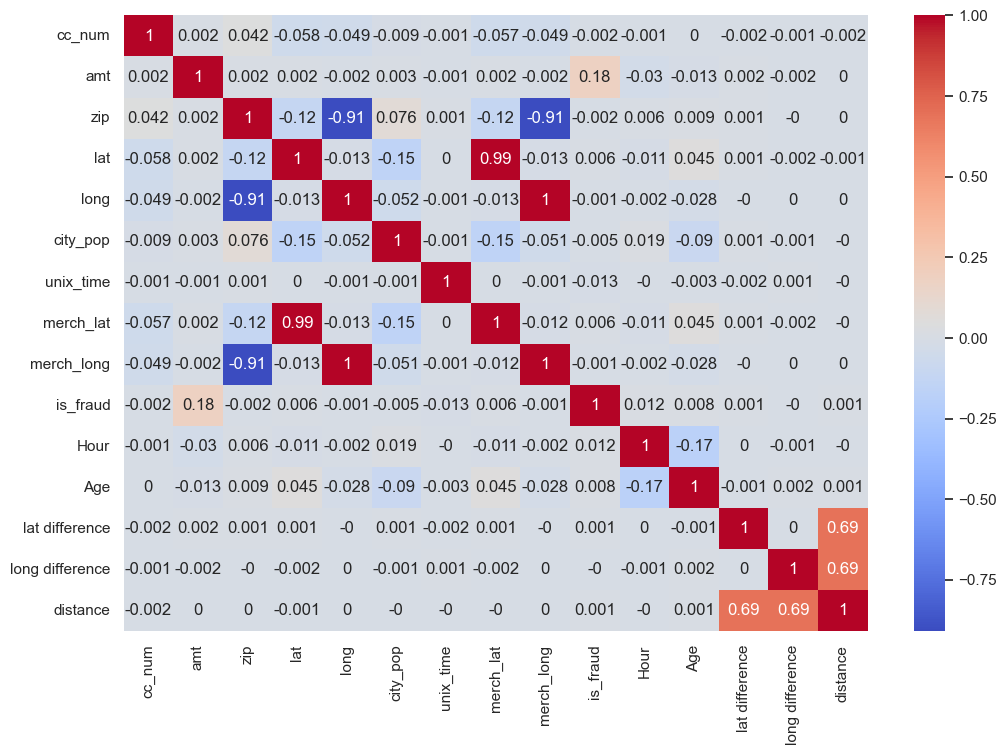

In [52]:
#Increase size of chart
sns.set(rc={'figure.figsize':(12,8)})

#Plotting Chart
sns.heatmap(data=round(df.corr(),3), cmap='coolwarm', annot=True);

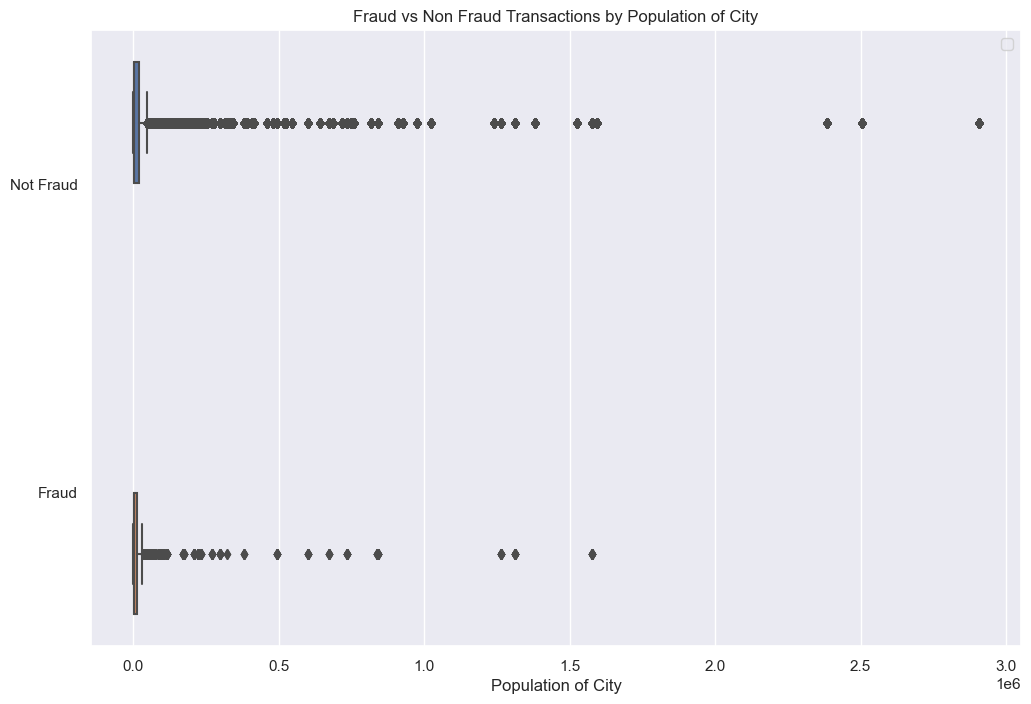

In [53]:
#Plotting Chart
ax = sns.boxplot(data=df, x='city_pop', y='is_fraud', orient='h', hue='is_fraud')

#Setting Title
ax.set_title('Fraud vs Non Fraud Transactions by Population of City')

#Setting axis
ax.set_yticklabels(['Not Fraud', 'Fraud'])
ax.set_xlabel('Population of City')
ax.set_ylabel('')

#Removing legend
plt.legend([], [])

#Show Chart
plt.show();

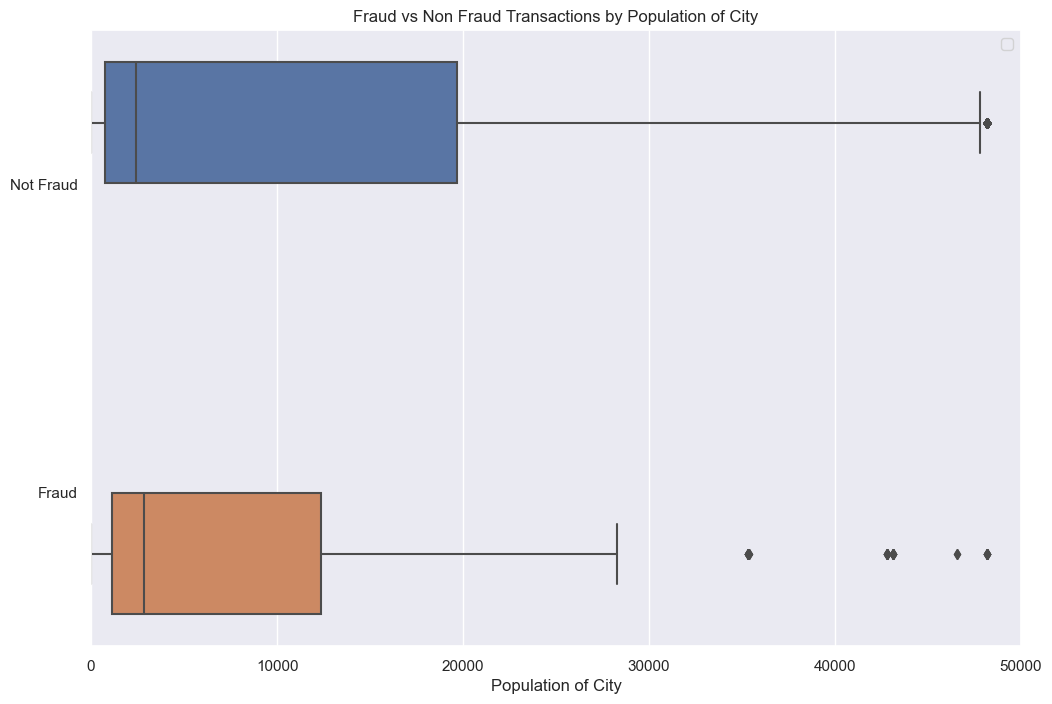

In [54]:
#Plotting Chart
ax = sns.boxplot(data=df, x='city_pop', y='is_fraud', orient='h', hue='is_fraud')

#Setting Title
ax.set_title('Fraud vs Non Fraud Transactions by Population of City')

#Setting axis
ax.set_yticklabels(['Not Fraud', 'Fraud'])
ax.set_xlabel('Population of City')
ax.set_ylabel('')
ax.set_xlim(0,50_000)

#Removing legend
plt.legend([], [])

#Show Chart
plt.show();

In [55]:
df['city_pop'].min()

23

In [56]:
df['city_pop'].max()

2906700

### Comments:
<br>
<br>
1) In the first boxplot visualisation, there were too many outliers therefore I did a deep dive into cities with a maximum population of 50,000.
<br>
<br>
2) Non-fraud transactions are more likely to occur in cities with a larger population.
<br>
<br>
3) I will utilise the definition from the below source to segregate Cities into 3 types based on their population size from largest to smallest, City, Town, Rural
<br>
<br>

[Link](https://blogs.worldbank.org/sustainablecities/how-do-we-define-cities-towns-and-rural-areas)

In [57]:
df['merchant'].nunique()

693

### Comments:
<br>
1) There are 693 number of unique merchants.
<br>
<br>
2) I will drop it for now and observe the performance of the upcoming models.

In [58]:
mylist = ['trans_date_trans_time','unix_time','cc_num','first','last','city','zip','dob','trans_num',\
          'street','lat','long','merch_lat','merch_long','lat difference','long difference',\
          'distance', 'state', 'merchant',\
          'amt',\
          'category','gender','city_pop','Hour', 'Day', 'Age','Year Month', 'job',\
          'is_fraud']

In [59]:
[i for i in list(df.columns) if i not in mylist]

[]

### Comments:
<br>
1) The first 3 rows in mylist are features to be dropped, 2nd row is a numerical feature, 4th row consists of categorical features and the last is the target label.
<br>
<br>
2) I will drop the features in the 1st 3 rows to save space before saving it to a feather file, more details below:
<br>
<br>

[Feather](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d)

In [60]:
df = df[mylist]
df = df.drop(labels=['trans_date_trans_time','unix_time','cc_num','first','last','city','zip','dob',\
                     'trans_num','street','lat','long','merch_lat','merch_long','lat difference',\
                     'long difference','distance', 'state', 'merchant', 'Year Month', 'job'],\
            axis=1)
df.head()

,amt,category,gender,city_pop,Hour,Day,Age,is_fraud
0,2.86,personal care,M,333497,12,Sun,54,0
1,29.84,personal care,F,302,12,Sun,32,0
2,41.28,health fitness,F,34496,12,Sun,52,0
3,60.05,misc pos,M,54767,12,Sun,35,0
4,3.19,travel,M,1126,12,Sun,67,0


In [61]:
df.to_feather('./Data/df_cleaned.feather')